In [1]:
pip install tensorflow-hub


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np


In [ ]:
# Load dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Take a subset
cifar_train_images = cifar_train_images[:1000] / 255.0
cifar_train_labels = cifar_train_labels[:1000]
cifar_test_images = cifar_test_images[:200] / 255.0
cifar_test_labels = cifar_test_labels[:200]



In [ ]:
# URL for the BiT ResNet model on TensorFlow Hub
model_url = "https://tfhub.dev/google/bit/m-r50x1/1"

# Load the model (without the head)
base_model = hub.KerasLayer(model_url, trainable=True)

# Build the complete model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(cifar_train_images, cifar_train_labels, epochs=8,
                    validation_data=(cifar_test_images, cifar_test_labels))



Epoch 1/8
32/32 [==============================] - 104s 2s/step - loss: 7.7534 - accuracy: 0.0840 - val_loss: 2.7051 - val_accuracy: 0.0700
Epoch 2/8
32/32 [==============================] - 72s 2s/step - loss: 2.5001 - accuracy: 0.0960 - val_loss: 2.4238 - val_accuracy: 0.1050
Epoch 3/8
32/32 [==============================] - 72s 2s/step - loss: 2.3712 - accuracy: 0.1400 - val_loss: 2.2402 - val_accuracy: 0.1950
Epoch 4/8
32/32 [==============================] - 72s 2s/step - loss: 2.1742 - accuracy: 0.1940 - val_loss: 2.1178 - val_accuracy: 0.2150
Epoch 5/8
32/32 [==============================] - 72s 2s/step - loss: 2.0017 - accuracy: 0.2380 - val_loss: 2.3034 - val_accuracy: 0.2100
Epoch 6/8
32/32 [==============================] - 72s 2s/step - loss: 1.8516 - accuracy: 0.3080 - val_loss: 1.9879 - val_accuracy: 0.2500
Epoch 7/8
32/32 [==============================] - 73s 2s/step - loss: 1.5454 - accuracy: 0.4030 - val_loss: 1.8300 - val_accuracy: 0.3400
Epoch 8/8
32/32 [=========

In [ ]:
test_loss, test_acc = model.evaluate(cifar_test_images, cifar_test_labels)
print("\nTest accuracy:", test_acc)

predictions = model.predict(cifar_test_images)
predicted_labels = np.argmax(predictions, axis=1)


7/7 [==============================] - 2s 288ms/step - loss: 2.2634 - accuracy: 0.2700

Test accuracy: 0.27000001072883606
7/7 [==============================] - 3s 216ms/step


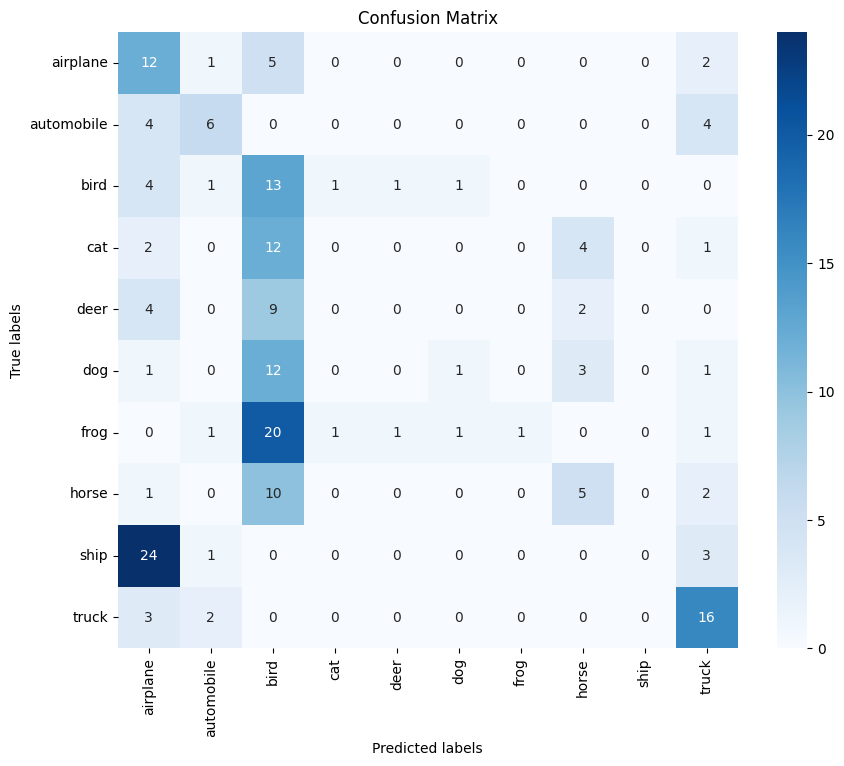

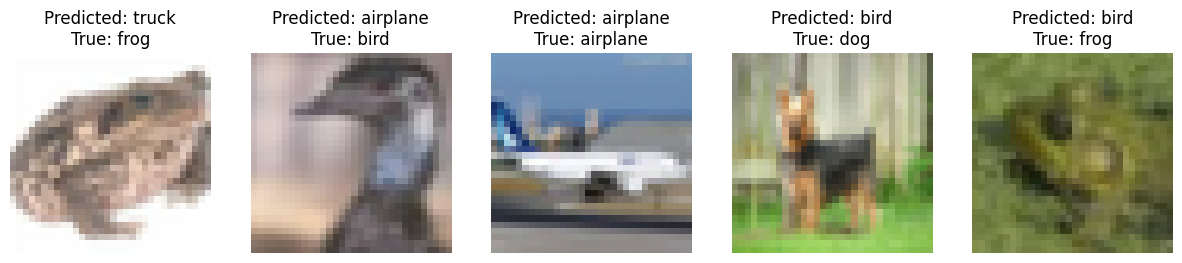

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CIFAR-10 Class Names
cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(cifar_test_labels, predicted_labels), annot=True, fmt='g', cmap='Blues',
            xticklabels=cifar10_labels, yticklabels=cifar10_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display examples with predicted outputs
num_samples = 5
idx_samples = np.random.choice(len(cifar_test_images), size=num_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(idx_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(cifar_test_images[idx])
    plt.title(f"Predicted: {cifar10_labels[predicted_labels[idx]]}\nTrue: {cifar10_labels[cifar_test_labels[idx][0]]}")
    plt.axis('off')
plt.show()

